# 라이브러리 호출

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 제곱근 변환

In [1]:
import pandas as pd

# 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_변환.csv"
]

# 적용할 컬럼명 (파일에 따라 다를 수 있으므로 확인 필요)
column_name = "폐업-개업 비율"  # 실제 컬럼명이 다를 경우 수정 필요

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 제곱 변환 적용
    if column_name in df.columns:
        df[column_name] = df[column_name] ** 2
    else:
        print(f"파일 {file_path}에 '{column_name}' 컬럼이 없습니다.")

    # 변환된 데이터 저장
    df.to_csv(output_path, index=False, encoding="utf-8-sig")

print("변환 완료 및 저장 완료.")

변환 완료 및 저장 완료.


## 비율 분포 확인


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_변환.csv
count    33010.000000
mean         1.532016
std         41.868429
min          0.000000
25%          0.000000
50%          0.297521
75%          1.000000
max       5041.000000
Name: 폐업-개업 비율, dtype: float64


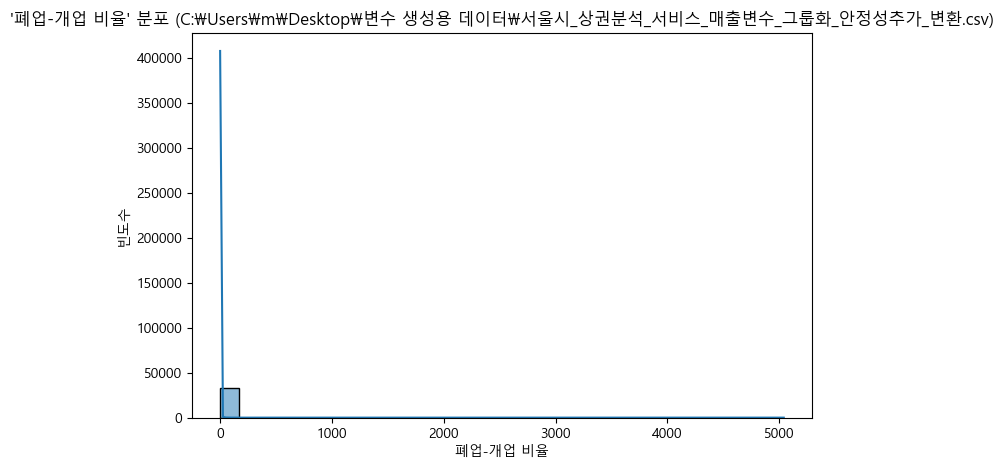


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_변환.csv
count    33462.000000
mean         1.996697
std         52.545445
min          0.000000
25%          0.177285
50%          0.521605
75%          1.000000
max       6889.000000
Name: 폐업-개업 비율, dtype: float64


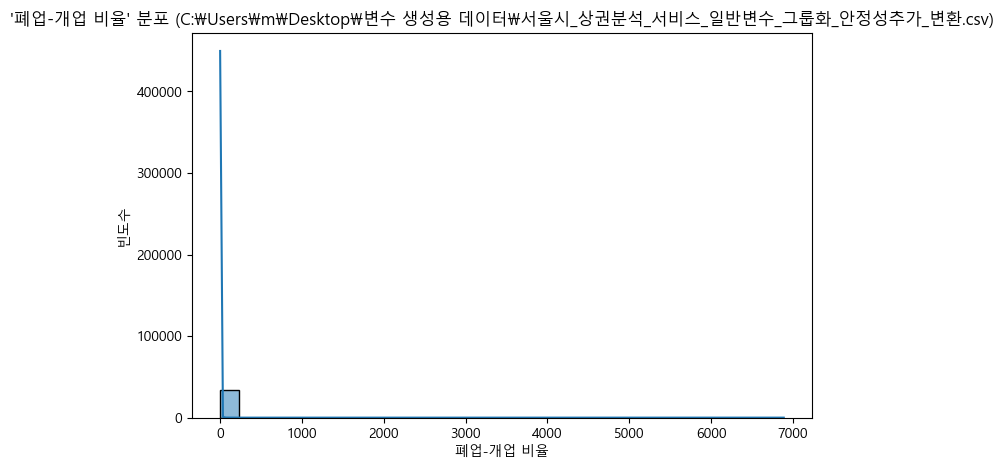

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_변환.csv"
]

# 적용할 컬럼명 (실제 컬럼명이 다를 수 있음)
column_name = "폐업-개업 비율"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        data = df[column_name]
        
        # 기본 통계량 출력
        print(f"\n📌 파일: {file_path}")
        print(data.describe())  # count, mean, std, min, 25%, 50%, 75%, max
        
        # 히스토그램과 KDE (밀도 함수) 그래프 출력
        plt.figure(figsize=(8, 5))
        sns.histplot(data, bins=30, kde=True)
        plt.title(f"'{column_name}' 분포 ({file_path.split('/')[-1]})")
        plt.xlabel(column_name)
        plt.ylabel("빈도수")
        plt.show()
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

# Yeo-Johnson 변환

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv"
]

# 적용할 컬럼명
column_name = "폐업-개업 비율"

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 변환 적용
    if column_name in df.columns:
        # 결측치 제거 (PowerTransformer는 NaN을 처리할 수 없음)
        df[column_name] = df[column_name].fillna(df[column_name].median())

        # Yeo-Johnson 변환 적용
        pt = PowerTransformer(method="yeo-johnson")
        df[column_name] = pt.fit_transform(df[[column_name]])

        # 변환된 데이터 저장
        df.to_csv(output_path, index=False, encoding="utf-8-sig")
        print(f"✅ {output_path} 저장 완료.")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv 저장 완료.
✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv 저장 완료.


## 비율 분포 확인


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv
count    3.301000e+04
mean     1.980711e-16
std      1.000015e+00
min     -1.331939e+00
25%     -1.331939e+00
50%      9.427108e-02
75%      7.784042e-01
max      4.376982e+00
Name: 폐업-개업 비율, dtype: float64


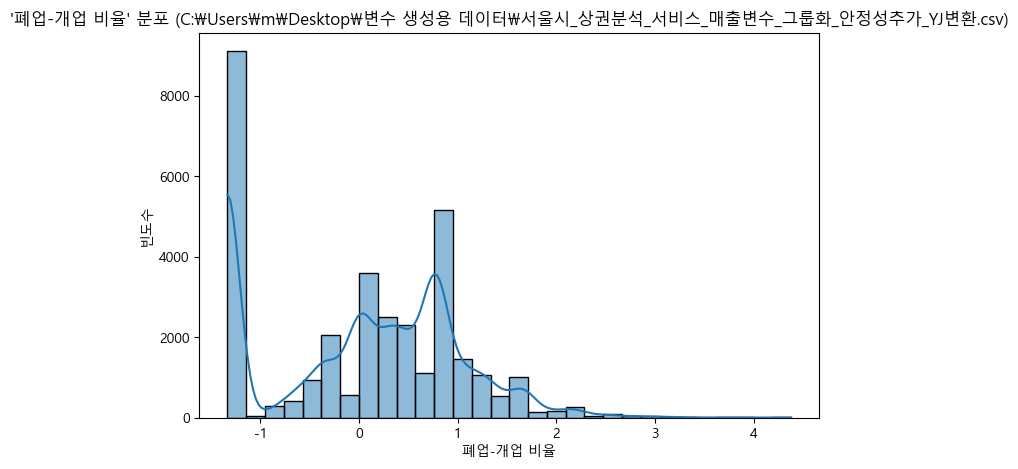


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv
count    3.346200e+04
mean    -2.998286e-16
std      1.000015e+00
min     -1.903072e+00
25%     -5.741304e-01
50%      5.168895e-02
75%      4.950015e-01
max      5.022361e+00
Name: 폐업-개업 비율, dtype: float64


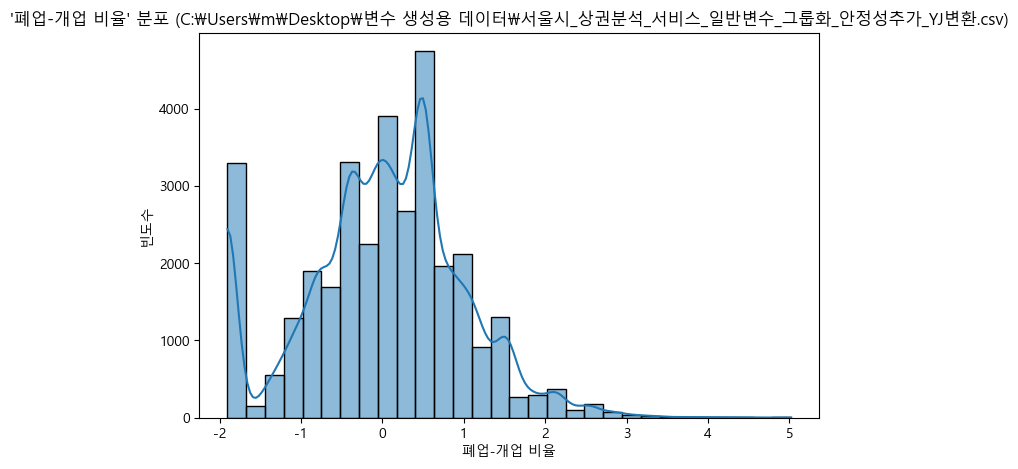

In [7]:
# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv"
]

# 적용할 컬럼명 (실제 컬럼명이 다를 수 있음)
column_name = "폐업-개업 비율"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        data = df[column_name]
        
        # 기본 통계량 출력
        print(f"\n📌 파일: {file_path}")
        print(data.describe())  # count, mean, std, min, 25%, 50%, 75%, max
        
        # 히스토그램과 KDE (밀도 함수) 그래프 출력
        plt.figure(figsize=(8, 5))
        sns.histplot(data, bins=30, kde=True)
        plt.title(f"'{column_name}' 분포 ({file_path.split('/')[-1]})")
        plt.xlabel(column_name)
        plt.ylabel("빈도수")
        plt.show()
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

# 안정성 변수 재정의

In [10]:
# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv"
]

# 적용할 컬럼명
column_name = "폐업-개업 비율"
new_column = "안정성"

# 기준값
threshold = -5.741304e-01

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 안정성 컬럼 생성
    if column_name in df.columns:
        df[new_column] = df[column_name].apply(lambda x: "안정" if x <= threshold else "불안정")

        # 변환된 데이터 저장
        df.to_csv(output_path, index=False, encoding="utf-8-sig")
        print(f"✅ {output_path} 저장 완료.")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv 저장 완료.
✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv 저장 완료.


## 안정 불안정 비율 확인

In [11]:
import pandas as pd

# 파일 경로 (변환된 최종 파일 중 하나 선택)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# 안정성 컬럼 확인
column_name = "안정성"

if column_name in df.columns:
    # 값의 분포 비율 계산
    stability_counts = df[column_name].value_counts(normalize=True) * 100

    # 결과 출력
    print(f"\n📊 '{column_name}' 컬럼 분포 비율:\n")
    print(stability_counts.round(2).astype(str) + " %")
else:
    print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")


📊 '안정성' 컬럼 분포 비율:

안정성
불안정    70.13 %
안정     29.87 %
Name: proportion, dtype: object


In [13]:
import pandas as pd

# 파일 경로 (변환된 최종 파일 중 하나 선택)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# 안정성 컬럼 확인
column_name = "안정성"

if column_name in df.columns:
    # 값의 분포 비율 계산
    stability_counts = df[column_name].value_counts(normalize=True) * 100

    # 결과 출력
    print(f"\n📊 '{column_name}' 컬럼 분포 비율:\n")
    print(stability_counts.round(2).astype(str) + " %")
else:
    print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")


📊 '안정성' 컬럼 분포 비율:

안정성
불안정    75.01 %
안정     24.99 %
Name: proportion, dtype: object


# 가설 1

프랜차이즈 비율과 폐업-개업 비율 간의 상관관계:
           프랜차이즈 비율  폐업-개업 비율
프랜차이즈 비율  1.000000  0.044329
폐업-개업 비율  0.044329  1.000000


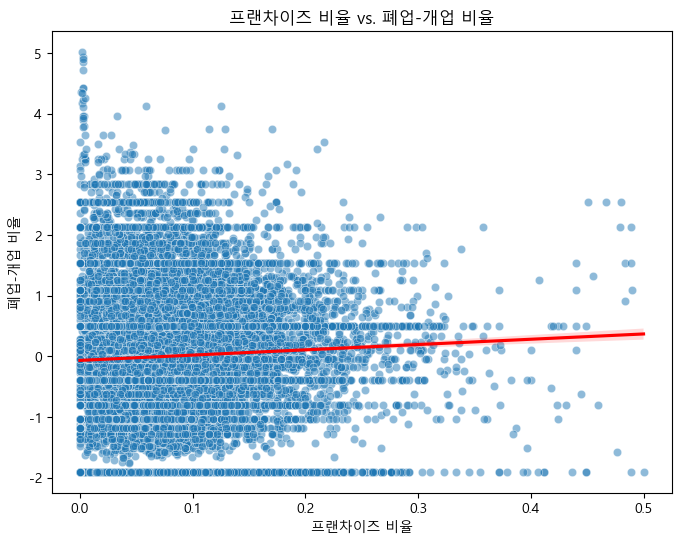

In [15]:
# 파일 경로
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)

# 상관관계 분석
if '프랜차이즈 비율' in df.columns and '폐업-개업 비율' in df.columns:
    correlation = df[['프랜차이즈 비율', '폐업-개업 비율']].corr()
    print("프랜차이즈 비율과 폐업-개업 비율 간의 상관관계:\n", correlation)
    
    # 비선형 관계 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['프랜차이즈 비율'], y=df['폐업-개업 비율'], alpha=0.5)
    sns.regplot(x=df['프랜차이즈 비율'], y=df['폐업-개업 비율'], scatter=False, color='red')
    plt.xlabel('프랜차이즈 비율')
    plt.ylabel('폐업-개업 비율')
    plt.title('프랜차이즈 비율 vs. 폐업-개업 비율')
    plt.show()
else:
    raise ValueError("'프랜차이즈 비율' 또는 '폐업-개업 비율' 컬럼이 존재하지 않습니다.")

## 2024년 비교

연분기 20241의 프랜차이즈 비율과 폐업-개업 비율 간의 상관관계:
           프랜차이즈 비율  폐업-개업 비율
프랜차이즈 비율  1.000000  0.006684
폐업-개업 비율  0.006684  1.000000


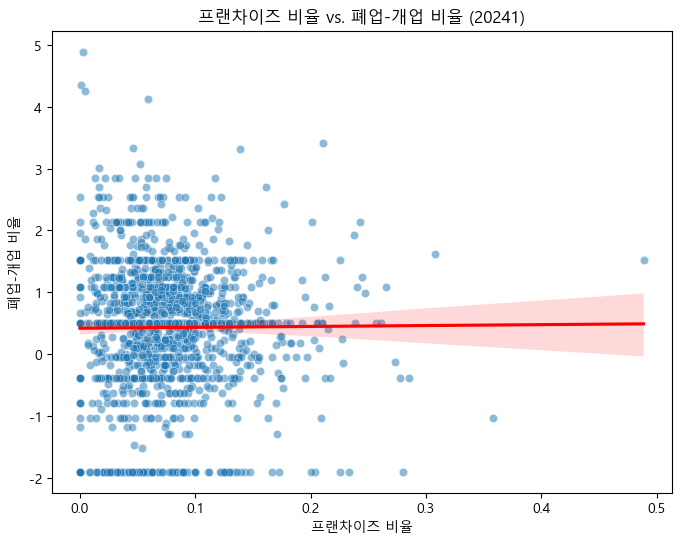

각 연분기별 상관계수:
     연분기      상관계수
0  20241  0.006684
1  20242  0.018406


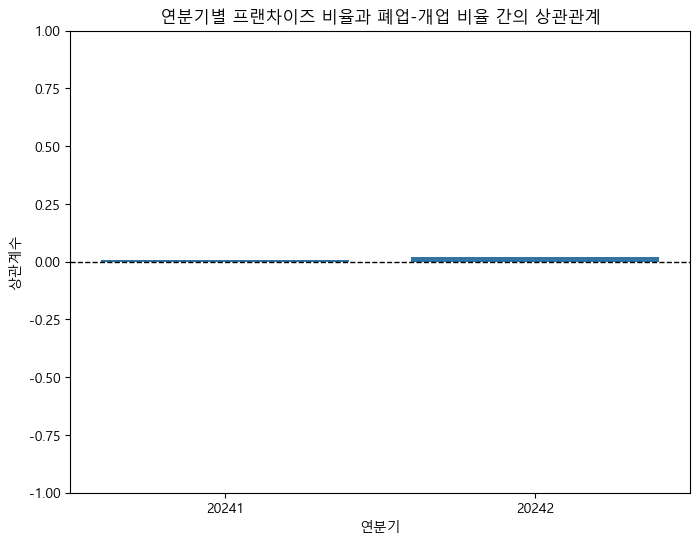

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)

# 분석할 연분기 리스트
selected_periods = [20241, 20242]  # 원하는 연분기 선택

# 특정 연분기(예: 20241)만 필터링하여 상관관계 분석
df_filtered = df[df['연분기'] == 20241]

if '프랜차이즈 비율' in df.columns and '폐업-개업 비율' in df.columns:
    if not df_filtered.empty:
        correlation = df_filtered[['프랜차이즈 비율', '폐업-개업 비율']].corr()
        print(f"연분기 20241의 프랜차이즈 비율과 폐업-개업 비율 간의 상관관계:\n", correlation)

        # 시각화
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_filtered['프랜차이즈 비율'], y=df_filtered['폐업-개업 비율'], alpha=0.5)
        sns.regplot(x=df_filtered['프랜차이즈 비율'], y=df_filtered['폐업-개업 비율'], scatter=False, color='red')
        plt.xlabel('프랜차이즈 비율')
        plt.ylabel('폐업-개업 비율')
        plt.title('프랜차이즈 비율 vs. 폐업-개업 비율 (20241)')
        plt.show()
    else:
        print("선택한 연분기에 해당하는 데이터가 없습니다.")

# 여러 연분기별 상관관계 분석
df_selected = df[df['연분기'].isin(selected_periods)]

if not df_selected.empty:
    period_correlations = df_selected.groupby('연분기')[['프랜차이즈 비율', '폐업-개업 비율']].corr().iloc[0::2, -1].reset_index()
    period_correlations.columns = ['연분기', 'drop', '상관계수']
    period_correlations = period_correlations.drop(columns=['drop'])

    print("각 연분기별 상관계수:")
    print(period_correlations)

    # 연분기별 상관계수 시각화
    plt.figure(figsize=(8, 6))
    sns.barplot(x=period_correlations['연분기'].astype(str), y=period_correlations['상관계수'])
    plt.xlabel('연분기')
    plt.ylabel('상관계수')
    plt.title('연분기별 프랜차이즈 비율과 폐업-개업 비율 간의 상관관계')
    plt.ylim(-1, 1)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.show()
else:
    print("선택한 연분기에 해당하는 데이터가 없습니다.")

# 가설 2

1년생존률과 폐업-개업 비율 간의 상관관계:
              1년생존률  폐업-개업 비율
1년생존률     1.000000 -0.113728
폐업-개업 비율 -0.113728  1.000000


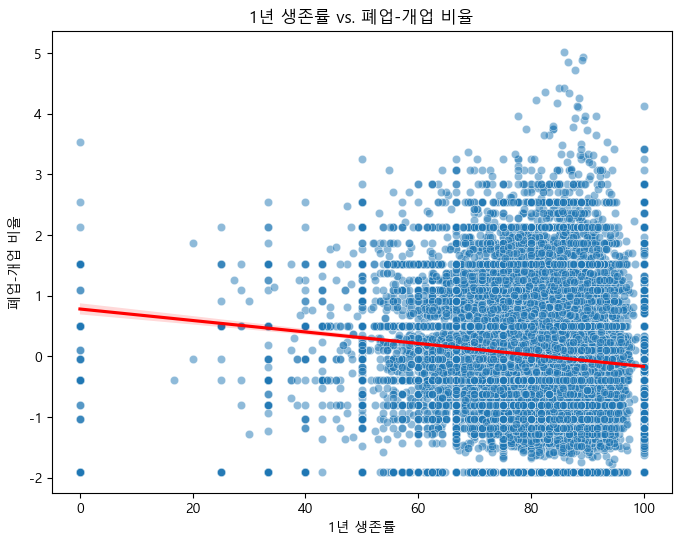

In [16]:
# 데이터 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv"
df = pd.read_csv(file_path)

# 문자열 '-'을 NaN으로 변환
df.replace('-', np.nan, inplace=True)

# 필요한 컬럼 숫자로 변환 (오류 발생 시 NaN 처리)
cols_to_convert = ["1년생존률", "폐업-개업 비율"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# NaN 제거
df.dropna(subset=cols_to_convert, inplace=True)

# 상관관계 분석
correlation = df[cols_to_convert].corr()
print("1년생존률과 폐업-개업 비율 간의 상관관계:\n", correlation)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["1년생존률"], y=df["폐업-개업 비율"], alpha=0.5)
sns.regplot(x=df["1년생존률"], y=df["폐업-개업 비율"], scatter=False, color='red')
plt.xlabel("1년 생존률")
plt.ylabel("폐업-개업 비율")
plt.title("1년 생존률 vs. 폐업-개업 비율")
plt.show()

# 가설 3

유동인구당 점포수과 폐업-개업 비율 간의 상관관계:
            유동인구당 점포수  폐업-개업 비율
유동인구당 점포수   1.000000  0.007604
폐업-개업 비율    0.007604  1.000000


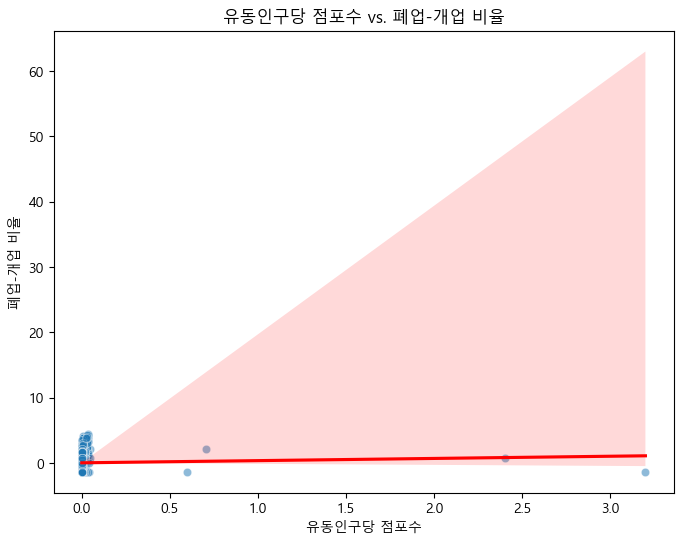

In [20]:
# 데이터 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv"
df = pd.read_csv(file_path)

# 문자열 '-'을 NaN으로 변환
df.replace('-', np.nan, inplace=True)

# 필요한 컬럼 숫자로 변환 (오류 발생 시 NaN 처리)
cols_to_convert = ["유동인구당 점포수", "폐업-개업 비율"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# NaN 제거
df.dropna(subset=cols_to_convert, inplace=True)

# 상관관계 분석
correlation = df[cols_to_convert].corr()
print("유동인구당 점포수과 폐업-개업 비율 간의 상관관계:\n", correlation)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["유동인구당 점포수"], y=df["폐업-개업 비율"], alpha=0.5)
sns.regplot(x=df["유동인구당 점포수"], y=df["폐업-개업 비율"], scatter=False, color='red')
plt.xlabel("유동인구당 점포수")
plt.ylabel("폐업-개업 비율")
plt.title("유동인구당 점포수 vs. 폐업-개업 비율")
plt.show()

# 가설 4

유동인구수과 폐업-개업 비율 간의 상관관계:
             유동인구수  폐업-개업 비율
유동인구수     1.00000   0.28279
폐업-개업 비율  0.28279   1.00000


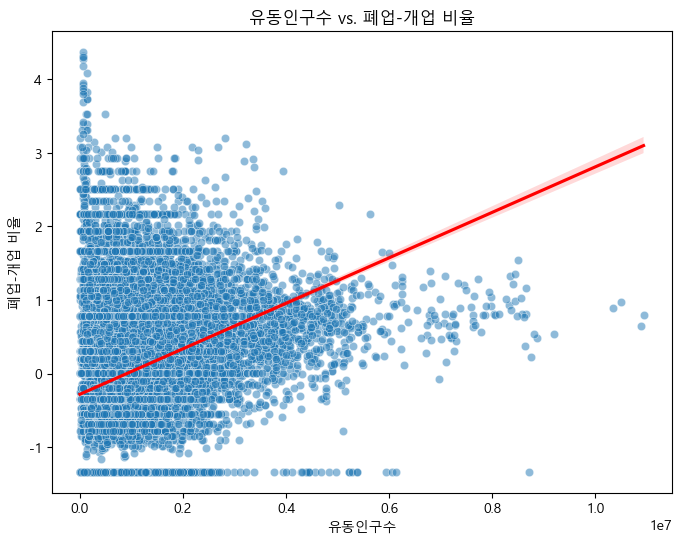

In [21]:
# 데이터 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv"
df = pd.read_csv(file_path)

# 문자열 '-'을 NaN으로 변환
df.replace('-', np.nan, inplace=True)

# 필요한 컬럼 숫자로 변환 (오류 발생 시 NaN 처리)
cols_to_convert = ["유동인구수", "폐업-개업 비율"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# NaN 제거
df.dropna(subset=cols_to_convert, inplace=True)

# 상관관계 분석
correlation = df[cols_to_convert].corr()
print("유동인구수과 폐업-개업 비율 간의 상관관계:\n", correlation)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["유동인구수"], y=df["폐업-개업 비율"], alpha=0.5)
sns.regplot(x=df["유동인구수"], y=df["폐업-개업 비율"], scatter=False, color='red')
plt.xlabel("유동인구수")
plt.ylabel("폐업-개업 비율")
plt.title("유동인구수 vs. 폐업-개업 비율")
plt.show()

c:\Users\m\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


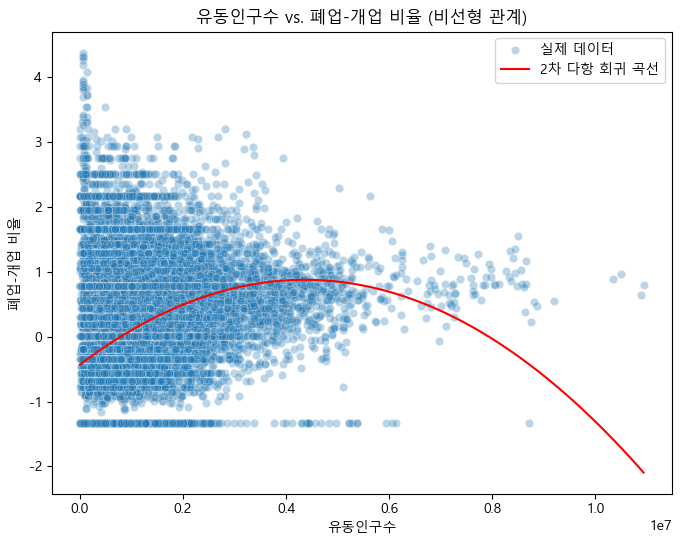

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 파일 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv"
df = pd.read_csv(file_path)

# 필요한 컬럼 선택
if '유동인구수' in df.columns and '폐업-개업 비율' in df.columns:
    X = df[['유동인구수']].dropna()
    y = df['폐업-개업 비율'].dropna()

    # 다항 회귀 (2차)
    poly = PolynomialFeatures(degree=2)  # 2차 다항식 변환
    X_poly = poly.fit_transform(X)

    # 모델 학습
    model = LinearRegression()
    model.fit(X_poly, y)

    # 예측 값 계산
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.values.flatten(), y=y, alpha=0.3, label="실제 데이터")
    plt.plot(X_range, y_pred, color='red', label="2차 다항 회귀 곡선")
    plt.xlabel('유동인구수')
    plt.ylabel('폐업-개업 비율')
    plt.title('유동인구수 vs. 폐업-개업 비율 (비선형 관계)')
    plt.legend()
    plt.show()

else:
    raise ValueError("'유동인구수' 또는 '폐업-개업 비율' 컬럼이 존재하지 않습니다.")

# 가설 5

유동인구별 매출과 폐업-개업 비율 간의 상관관계:
           유동인구별 매출  폐업-개업 비율
유동인구별 매출  1.000000 -0.004526
폐업-개업 비율 -0.004526  1.000000


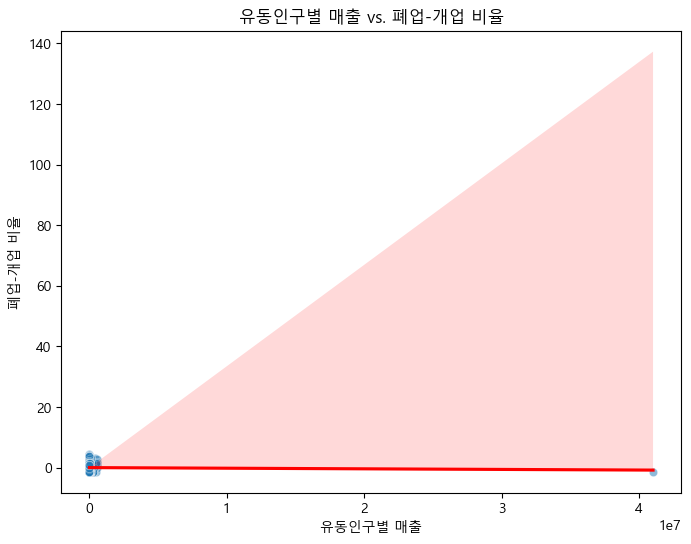

In [ ]:
# 파일 경로
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)

# 상관관계 분석
if '매출 전환률' in df.columns and '폐업-개업 비율' in df.columns:
    correlation = df[['매출 전환률', '폐업-개업 비율']].corr()
    print("매출 전환률과 폐업-개업 비율 간의 상관관계:\n", correlation)
    
    # 비선형 관계 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['매출 전환률'], y=df['폐업-개업 비율'], alpha=0.5)
    sns.regplot(x=df['매출 전환률'], y=df['폐업-개업 비율'], scatter=False, color='red')
    plt.xlabel('매출 전환률')
    plt.ylabel('폐업-개업 비율')
    plt.title('매출 전환률 vs. 폐업-개업 비율')
    plt.show()
else:
    raise ValueError("'유동인구별 매출' 또는 '폐업-개업 비율' 컬럼이 존재하지 않습니다.")

# 가설 6

In [ ]:
# 파일 경로
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)

# 상관관계 분석
if '점포당 매출' in df.columns and '폐업-개업 비율율' in df.columns:
    correlation = df[['점포당 매출', '폐업-개업 비율']].corr()
    print("점포당 매출과 폐업-개업 비율 간의 상관관계:\n", correlation)
    
    # 비선형 관계 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['점포당 매출'], y=df['폐업-개업 비율'], alpha=0.5)
    sns.regplot(x=df['점포당 매출'], y=df['폐업-개업 비율'], scatter=False, color='red')
    plt.xlabel('점포당 매출')
    plt.ylabel('폐업-개업 비율')
    plt.title('매출 전환률 vs. 폐업-개업 비율')
    plt.show()
else:
    raise ValueError("'유동인구별 매출' 또는 '폐업-개업 비율' 컬럼이 존재하지 않습니다.")

# 기준 변수 재정의 - 3년 생존율

## 비율 확인


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv
count     33010
unique      623
top          50
freq       2038
Name: 3년생존률, dtype: object


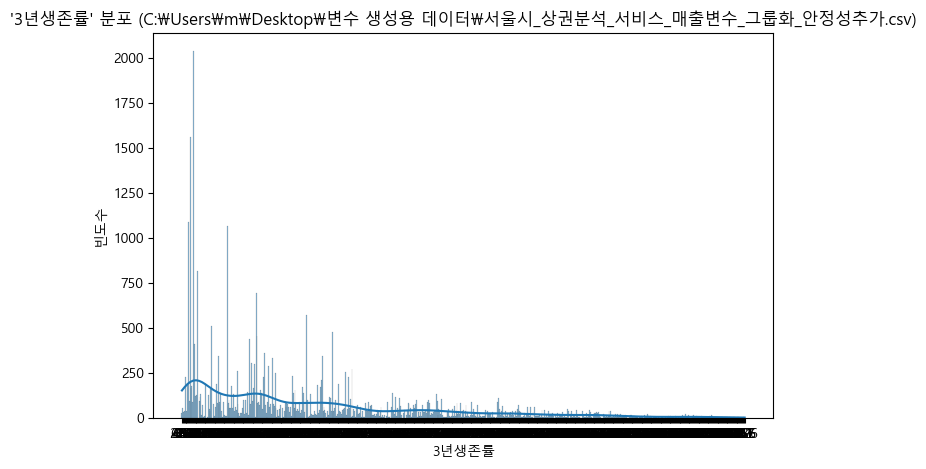


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv
count     33462
unique      623
top          50
freq       2092
Name: 3년생존률, dtype: object


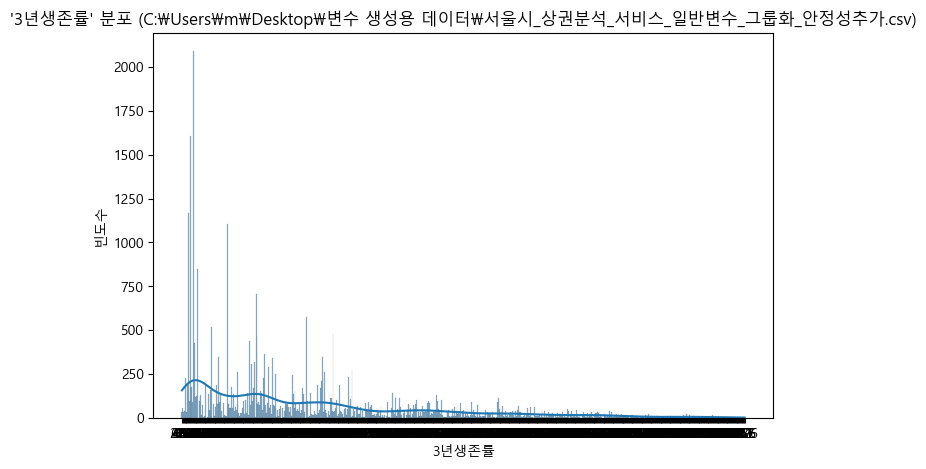

In [4]:
# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 적용할 컬럼명 (실제 컬럼명이 다를 수 있음)
column_name = "3년생존률"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        data = df[column_name]
        
        # 기본 통계량 출력
        print(f"\n📌 파일: {file_path}")
        print(data.describe())  # count, mean, std, min, 25%, 50%, 75%, max
        
        # 히스토그램과 KDE (밀도 함수) 그래프 출력
        plt.figure(figsize=(8, 5))
        sns.histplot(data, bins=30, kde=True)
        plt.title(f"'{column_name}' 분포 ({file_path.split('/')[-1]})")
        plt.xlabel(column_name)
        plt.ylabel("빈도수")
        plt.show()
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

In [7]:
import pandas as pd

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 적용할 컬럼명
column_name = "3년생존률"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        # 문자열을 숫자로 변환 (숫자가 아닌 값은 NaN으로 변환)
        data = pd.to_numeric(df[column_name], errors='coerce')

        # NaN 값 제외하고 계산
        mean_value = data.dropna().mean()
        median_value = data.dropna().median()
        mode_value = data.dropna().mode().iloc[0]  # 최빈값이 여러 개일 경우 첫 번째 값 선택

        # 결과 출력
        print(f"\n📌 파일: {file_path}")
        print(f"▶ 평균: {mean_value:.4f}")
        print(f"▶ 최빈값: {mode_value:.4f}")
        print(f"▶ 중앙값: {median_value:.4f}")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv
▶ 평균: 60.0089
▶ 최빈값: 50.0000
▶ 중앙값: 60.0000

📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv
▶ 평균: 60.1279
▶ 최빈값: 50.0000
▶ 중앙값: 60.0000


In [8]:
import pandas as pd

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 적용할 컬럼명
column_name = "3년생존률"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        # 문자열을 숫자로 변환 (숫자가 아닌 값은 NaN으로 변환)
        data = pd.to_numeric(df[column_name], errors='coerce')

        # NaN 값 제외하고 계산
        mean_value = data.dropna().mean()
        median_value = data.dropna().median()
        mode_value = data.dropna().mode().iloc[0]  # 최빈값이 여러 개일 경우 첫 번째 값 선택

        # 평균, 중앙값, 최빈값의 빈도 계산
        mean_count = (data == mean_value).sum()
        median_count = (data == median_value).sum()
        mode_count = (data == mode_value).sum()

        # 결과 출력
        print(f"\n📌 파일: {file_path}")
        print(f"▶ 평균: {mean_value:.4f} (빈도: {mean_count}회)")
        print(f"▶ 최빈값: {mode_value:.4f} (빈도: {mode_count}회)")
        print(f"▶ 중앙값: {median_value:.4f} (빈도: {median_count}회)")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv
▶ 평균: 60.0089 (빈도: 0회)
▶ 최빈값: 50.0000 (빈도: 2038회)
▶ 중앙값: 60.0000 (빈도: 1067회)

📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv
▶ 평균: 60.1279 (빈도: 0회)
▶ 최빈값: 50.0000 (빈도: 2092회)
▶ 중앙값: 60.0000 (빈도: 1103회)


In [9]:
import pandas as pd

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 적용할 컬럼명
column_name = "3년생존률"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        # 문자열을 숫자로 변환 (숫자가 아닌 값은 NaN으로 변환)
        data = pd.to_numeric(df[column_name], errors='coerce')

        # NaN 값 제외하고 계산
        total_count = data.dropna().shape[0]  # 전체 데이터 개수
        mean_value = data.mean()
        median_value = data.median()
        mode_value = data.mode().iloc[0]  # 최빈값이 여러 개일 경우 첫 번째 값 선택

        # 평균, 중앙값, 최빈값의 빈도 계산
        mean_count = (data == mean_value).sum()
        median_count = (data == median_value).sum()
        mode_count = (data == mode_value).sum()

        # 퍼센트 계산
        mean_pct = (mean_count / total_count) * 100
        median_pct = (median_count / total_count) * 100
        mode_pct = (mode_count / total_count) * 100

        # 결과 출력
        print(f"\n📌 파일: {file_path}")
        print(f"▶ 평균: {mean_value:.4f} (빈도: {mean_count}회, 전체 대비 {mean_pct:.2f}%)")
        print(f"▶ 최빈값: {mode_value:.4f} (빈도: {mode_count}회, 전체 대비 {mode_pct:.2f}%)")
        print(f"▶ 중앙값: {median_value:.4f} (빈도: {median_count}회, 전체 대비 {median_pct:.2f}%)")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv
▶ 평균: 60.0089 (빈도: 0회, 전체 대비 0.00%)
▶ 최빈값: 50.0000 (빈도: 2038회, 전체 대비 6.20%)
▶ 중앙값: 60.0000 (빈도: 1067회, 전체 대비 3.25%)

📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv
▶ 평균: 60.1279 (빈도: 0회, 전체 대비 0.00%)
▶ 최빈값: 50.0000 (빈도: 2092회, 전체 대비 6.28%)
▶ 중앙값: 60.0000 (빈도: 1103회, 전체 대비 3.31%)


In [10]:
import pandas as pd

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 적용할 컬럼명
column_name = "3년생존률"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    if column_name in df.columns:
        # 문자열을 숫자로 변환 (숫자가 아닌 값은 NaN으로 변환)
        data = pd.to_numeric(df[column_name], errors='coerce').dropna()

        # 값별 빈도 계산 (내림차순 정렬)
        value_counts = data.value_counts().sort_values(ascending=False)

        # 전체 개수
        total_count = value_counts.sum()

        # 누적 백분율 계산
        cumulative_percent = (value_counts.cumsum() / total_count) * 100

        # 상위 35%에 해당하는 값 필터링
        top_35_values = value_counts[cumulative_percent <= 35]

        # 결과 출력
        print(f"\n📌 파일: {file_path}")
        print(f"▶ 상위 35%에 해당하는 값 및 빈도수:\n")
        print(top_35_values)
        print(f"\n▶ 해당 값 개수: {len(top_35_values)}개")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv
▶ 상위 35%에 해당하는 값 및 빈도수:

3년생존률
50.0     2038
66.7     1563
100.0    1086
60.0     1067
75.0      818
57.1      695
62.5      570
71.4      511
80.0      474
33.3      454
55.6      435
40.0      411
63.6      361
42.9      345
54.5      342
70.0      331
Name: count, dtype: int64

▶ 해당 값 개수: 16개

📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv
▶ 상위 35%에 해당하는 값 및 빈도수:

3년생존률
50.0     2092
66.7     1606
100.0    1170
60.0     1103
75.0      846
57.1      706
62.5      577
71.4      519
80.0      486
33.3      466
55.6      438
40.0      425
63.6      363
42.9      346
54.5      345
Name: count, dtype: int64

▶ 해당 값 개수: 15개


In [11]:
top_35_min_value = top_35_values.index.min()  # 상위 35% 중 최소값 찾기
print(f"📌 상위 35% 기준 최소값: {top_35_min_value}")

📌 상위 35% 기준 최소값: 33.3


## 안정성 변수 재정의

In [16]:
import pandas as pd

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\일반변수_안정성추가.csv"
]

# 적용할 컬럼명
column_name = "3년생존률"
new_column = "안정성"

# 기준값
threshold = 35

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 변환 수행
    if column_name in df.columns:
        # 숫자로 변환 (문자 -> 숫자)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

        # 안정성 컬럼 생성
        df[new_column] = df[column_name].apply(lambda x: "안정" if x >= threshold else "불안정")

        # 변환된 데이터 저장
        df.to_csv(output_path, index=False, encoding="utf-8-sig")
        print(f"✅ {output_path} 저장 완료.")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

✅ C:\Users\m\Desktop\변수 생성용 데이터\매출변수_안정성추가.csv 저장 완료.
✅ C:\Users\m\Desktop\변수 생성용 데이터\일반변수_안정성추가.csv 저장 완료.
